# Importy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp

___
# Zadanie 1

In [3]:
def simulateAR1(theta, sigma_2, n, x_0=0):
    z_trajectory = np.random.normal(loc=0, scale=np.sqrt(sigma_2), size=n)
    x_t = np.zeros(n)
    x_t[0] = x_0
    for i in range(1,n):
        x_t[i] = theta * x_t[i-1] + z_trajectory[i]
 
    return x_t

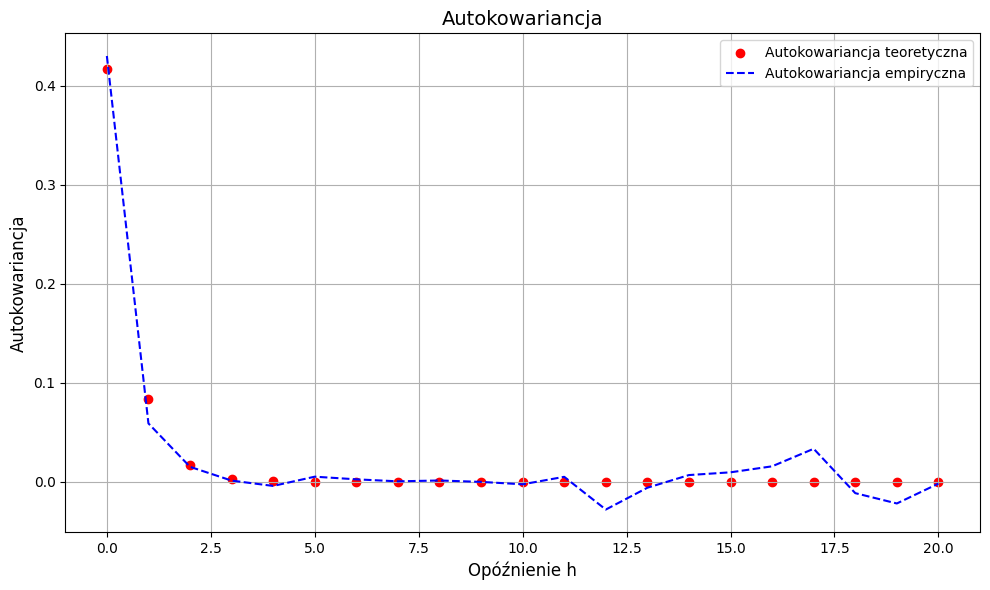

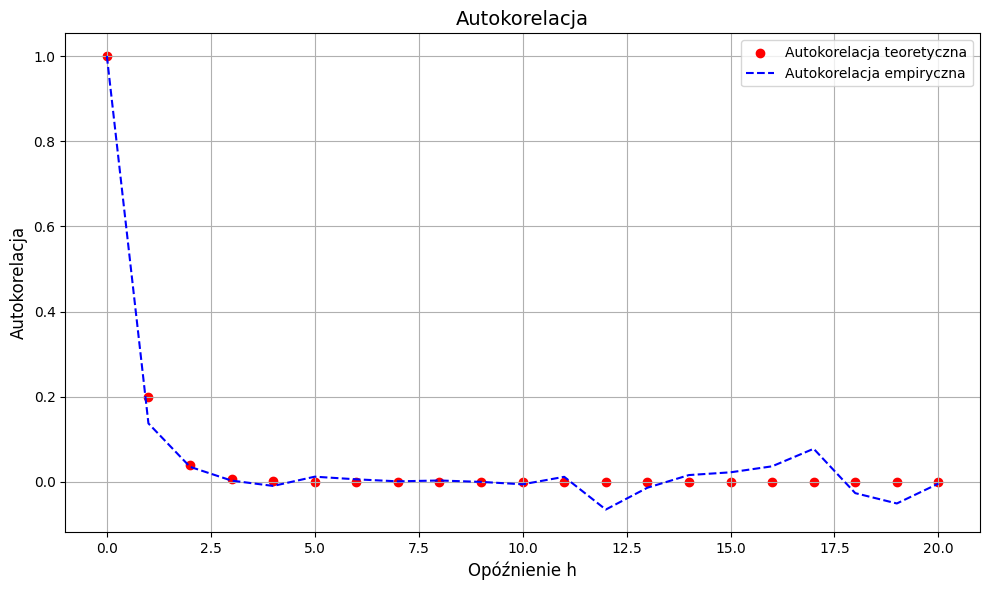

In [4]:
n = 1000
theta = 0.2
sigma_2 = 0.4
x_0 = 0
h_values = np.arange(0,21)

x_t = simulateAR1(theta, sigma_2, n, x_0)

def autokowariancja_teo(h):
    return (sigma_2 * (theta**np.abs(h)))/(1-theta**2)

def autokorelacja_teo(h):
    return (theta ** np.abs(h))

def autokowariancja_emp(h, x_trajectory):
    n = len(x_trajectory)
    x_mean = np.mean(x_trajectory)
 
    x = x_trajectory[:n - h]
    x_h = x_trajectory[h:]
 
    return (1 / n) * np.sum((x - x_mean) * (x_h - x_mean))

def autokorelacja_emp(h, x_trajectory):
    return autokowariancja_emp(h, x_trajectory) / autokowariancja_emp(0, x_trajectory)

teo_kow = np.zeros(len(h_values))
teo_kor = np.zeros(len(h_values))
emp_kow = np.zeros(len(h_values))
emp_kor = np.zeros(len(h_values))
 
for i in range(len(h_values)):
    h = h_values[i]
 
    teo_kow[i] = autokowariancja_teo(h)
    teo_kor[i] = autokorelacja_teo(h)
 
    emp_kow[i] = autokowariancja_emp(h, x_t)
    emp_kor[i] = autokorelacja_emp(h, x_t)


plt.figure(figsize=(10, 6))
plt.scatter(h_values, teo_kow, color='red', label='Autokowariancja teoretyczna')
plt.plot(h_values, emp_kow, color='blue', linestyle='--', label='Autokowariancja empiryczna')
plt.xlabel('Opóźnienie h', fontsize=12)
plt.ylabel('Autokowariancja', fontsize=12)
plt.title('Autokowariancja', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(h_values, teo_kor, color='red', label='Autokorelacja teoretyczna')
plt.plot(h_values, emp_kor, color='blue', linestyle='--', label='Autokorelacja empiryczna')
plt.xlabel('Opóźnienie h', fontsize=12)
plt.ylabel('Autokorelacja', fontsize=12)
plt.title('Autokorelacja', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

___
# Zadanie 2

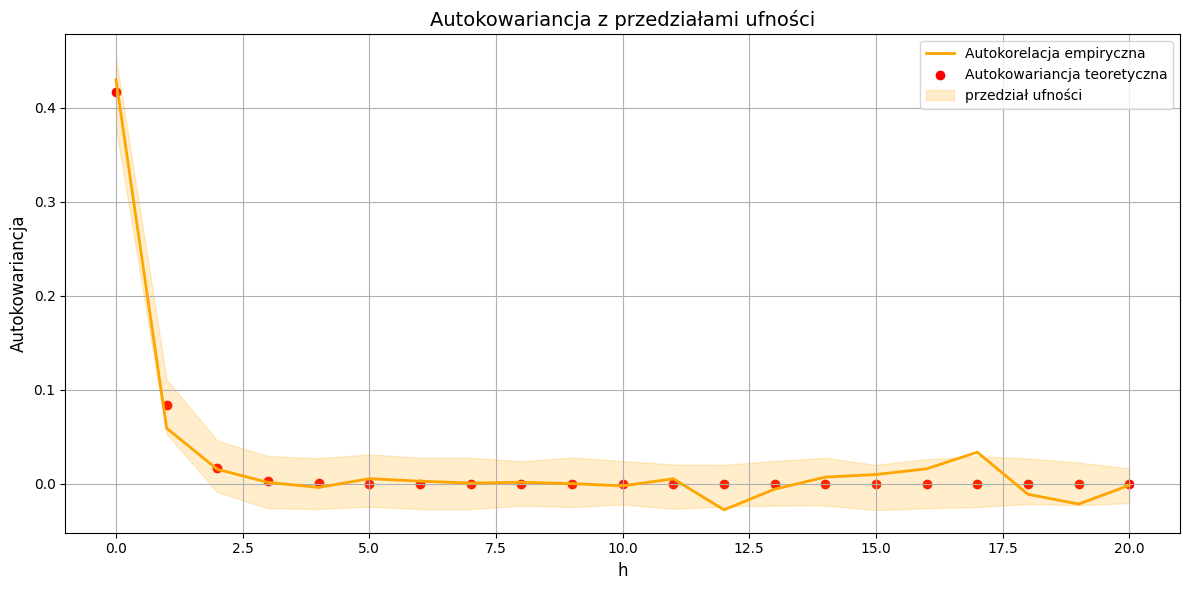

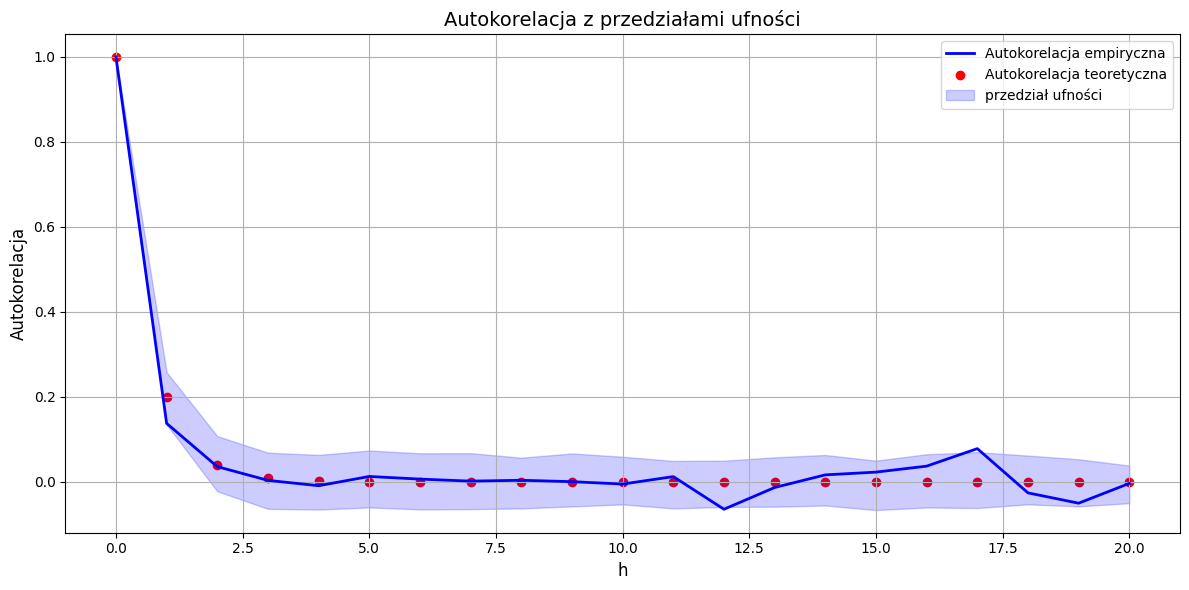

In [5]:
M = 100
n = 10**3
x_0 = 0
theta = 0.2
sigma_2 = 0.4
h = np.arange(0, 21, 1)

confidence = 0.95
alpha = (1 - confidence) / 2

kow_values = np.zeros((M, len(h)))
kor_values = np.zeros((M, len(h)))

for i in range(M):
    X_t = simulateAR1(theta, sigma_2, n, x_0)

    for j, h_val in enumerate(h):
        kow_values[i, j] = autokowariancja_emp(h_val, X_t)
        kor_values[i, j] = autokorelacja_emp(h_val, X_t)

kow_ci = np.percentile(kow_values, [100 * alpha, 100 * (1 - alpha)], axis=0)
kor_ci = np.percentile(kor_values, [100 * alpha, 100 * (1 - alpha)], axis=0)

plt.figure(figsize=(12, 6))
plt.plot(h, emp_kow, label='Autokorelacja empiryczna', linestyle='-', color='orange', linewidth=2)
plt.scatter(h, teo_kow, color='red', label='Autokowariancja teoretyczna')
plt.fill_between(h, kow_ci[0, :], kow_ci[1, :], color='orange', alpha=0.2, label='przedział ufności')
plt.title('Autokowariancja z przedziałami ufności', fontsize=14)
plt.xlabel('h', fontsize=12)
plt.ylabel('Autokowariancja', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(h, emp_kor, label='Autokorelacja empiryczna', linestyle='-', color='blue', linewidth=2)
plt.scatter(h, teo_kor, color='red', label='Autokorelacja teoretyczna')
plt.fill_between(h, kor_ci[0, :], kor_ci[1, :], color='blue', alpha=0.2, label='przedział ufności')
plt.title('Autokorelacja z przedziałami ufności', fontsize=14)
plt.xlabel('h', fontsize=12)
plt.ylabel('Autokorelacja', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()